In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [4]:
df.head()

Timestamp  Machine_ID Operation_Mode  Temperature_C  \
0  2024-01-01 00:00:00          39           Idle      74.137590   
1  2024-01-01 00:01:00          29         Active      84.264558   
2  2024-01-01 00:02:00          15         Active      44.280102   
3  2024-01-01 00:03:00          43         Active      40.568502   
4  2024-01-01 00:04:00           8           Idle      75.063817   

   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  Packet_Loss_%  \
0      3.500595              8.612162           10.650542       0.207764   
1      3.355928              2.268559           29.111810       2.228464   
2      2.079766              6.144105           18.357292       1.639416   
3      0.298238              4.067825           29.153629       1.161021   
4      0.345810              6.225737           34.029191       4.796520   

   Quality_Control_Defect_Rate_%  Production_Speed_units_per_hr  \
0                       7.751261                     477.657391   
1                       4.989172                     398.174747   
2                       0.456816                     108.074959   
3                       4.582974                     329.579410   
4                       2.287716                     159.113525   

   Predictive_Maintenance_Score  Error_Rate_% Efficiency_Status  
0                      0.344650     14.965470               Low  
1                      0.769848      7.678270               Low  
2                      0.987086      8.198391               Low  
3                      0.983390      2.740847            Medium  
4                      0.573117     12.100686               Low

In [5]:
df["Efficiency_Status"].value_counts()

Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [6]:
df.columns

Index(['Timestamp', 'Machine_ID', 'Operation_Mode', 'Temperature_C',
       'Vibration_Hz', 'Power_Consumption_kW', 'Network_Latency_ms',
       'Packet_Loss_%', 'Quality_Control_Defect_Rate_%',
       'Production_Speed_units_per_hr', 'Predictive_Maintenance_Score',
       'Error_Rate_%', 'Efficiency_Status'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   Timestamp                      100000 non-null  datetime64[ns]
 1   Machine_ID                     100000 non-null  int64         
 2   Operation_Mode                 100000 non-null  category      
 3   Temperature_C                  100000 non-null  float64       
 4   Vibration_Hz                   100000 non-null  float64       
 5   Power_Consumption_kW           100000 non-null  float64       
 6   Network_Latency_ms             100000 non-null  float64       
 7   Packet_Loss_%                  100000 non-null  float64       
 8   Quality_Control_Defect_Rate_%  100000 non-null  float64       
 9   Production_Speed_units_per_hr  100000 non-null  float64       
 10  Predictive_Maintenance_Score   100000 non-null  float64       
 11  E

## Data Processing

In [8]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors='coerce')

In [10]:
df.isnull().sum()

Timestamp                        0
Machine_ID                       0
Operation_Mode                   0
Temperature_C                    0
Vibration_Hz                     0
Power_Consumption_kW             0
Network_Latency_ms               0
Packet_Loss_%                    0
Quality_Control_Defect_Rate_%    0
Production_Speed_units_per_hr    0
Predictive_Maintenance_Score     0
Error_Rate_%                     0
Efficiency_Status                0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [13]:
categorical_cols = ["Operation_Mode", "Efficiency_Status"]
for col in categorical_cols:
    df[col] = df[col].astype('category')

## EDA

In [15]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.to_list()

In [16]:
numeric_cols

['Machine_ID',
 'Temperature_C',
 'Vibration_Hz',
 'Power_Consumption_kW',
 'Network_Latency_ms',
 'Packet_Loss_%',
 'Quality_Control_Defect_Rate_%',
 'Production_Speed_units_per_hr',
 'Predictive_Maintenance_Score',
 'Error_Rate_%']

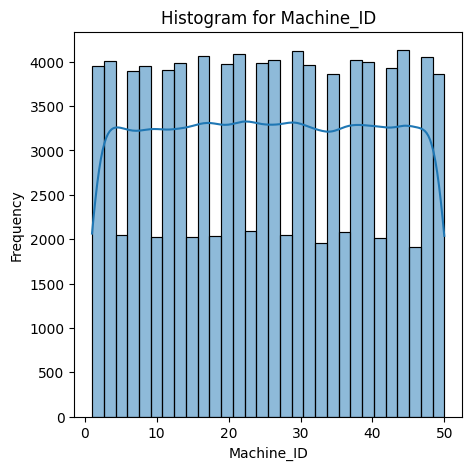

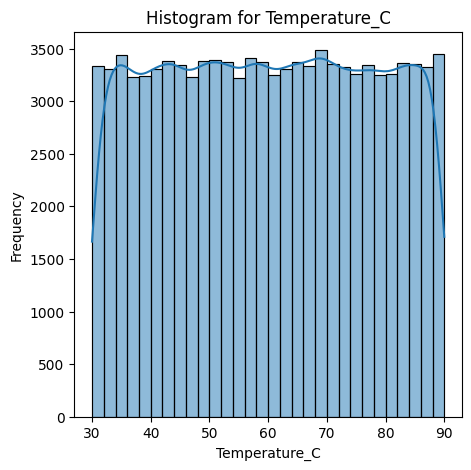

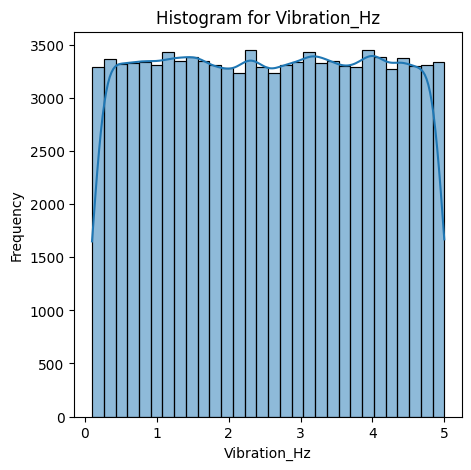

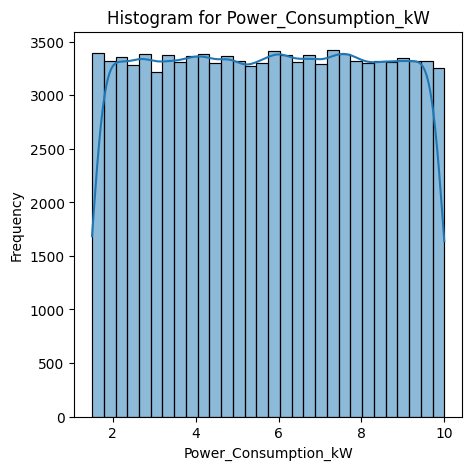

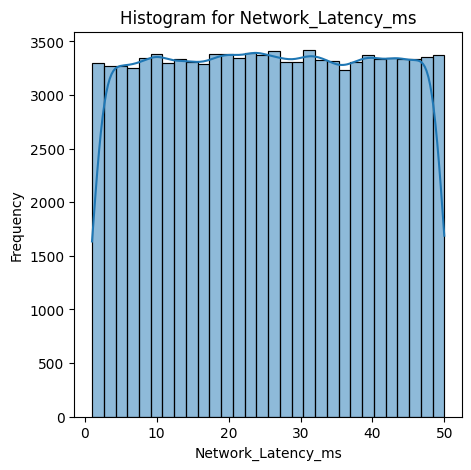

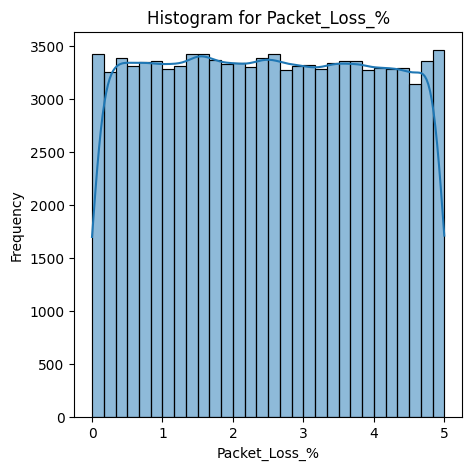

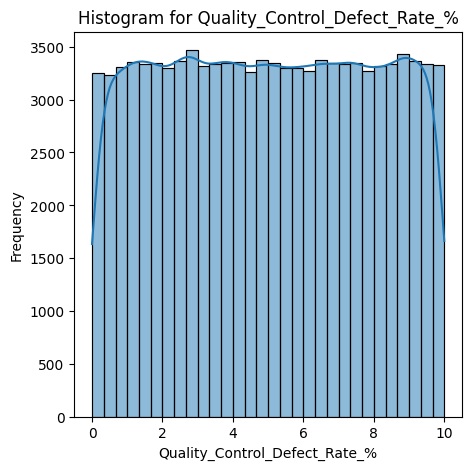

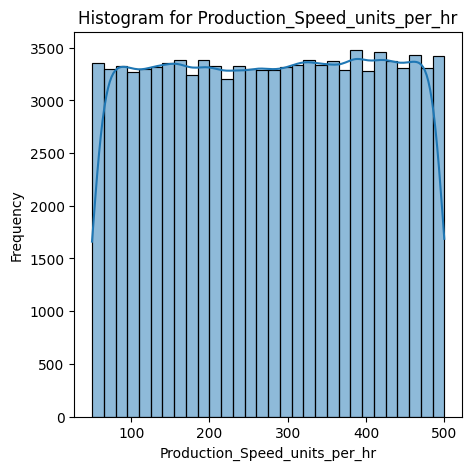

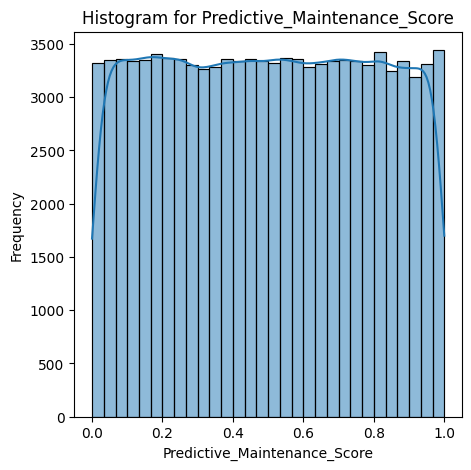

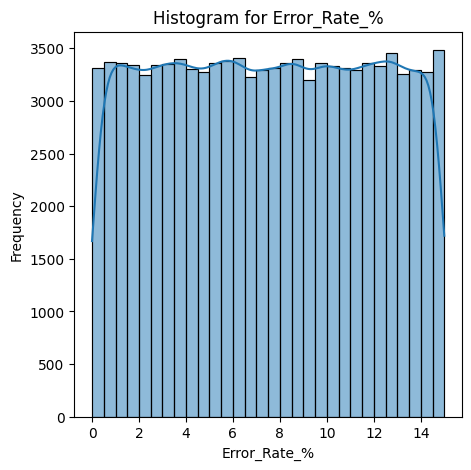

In [17]:
for col in numeric_cols:
    plt.figure(figsize=(5,5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram for {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

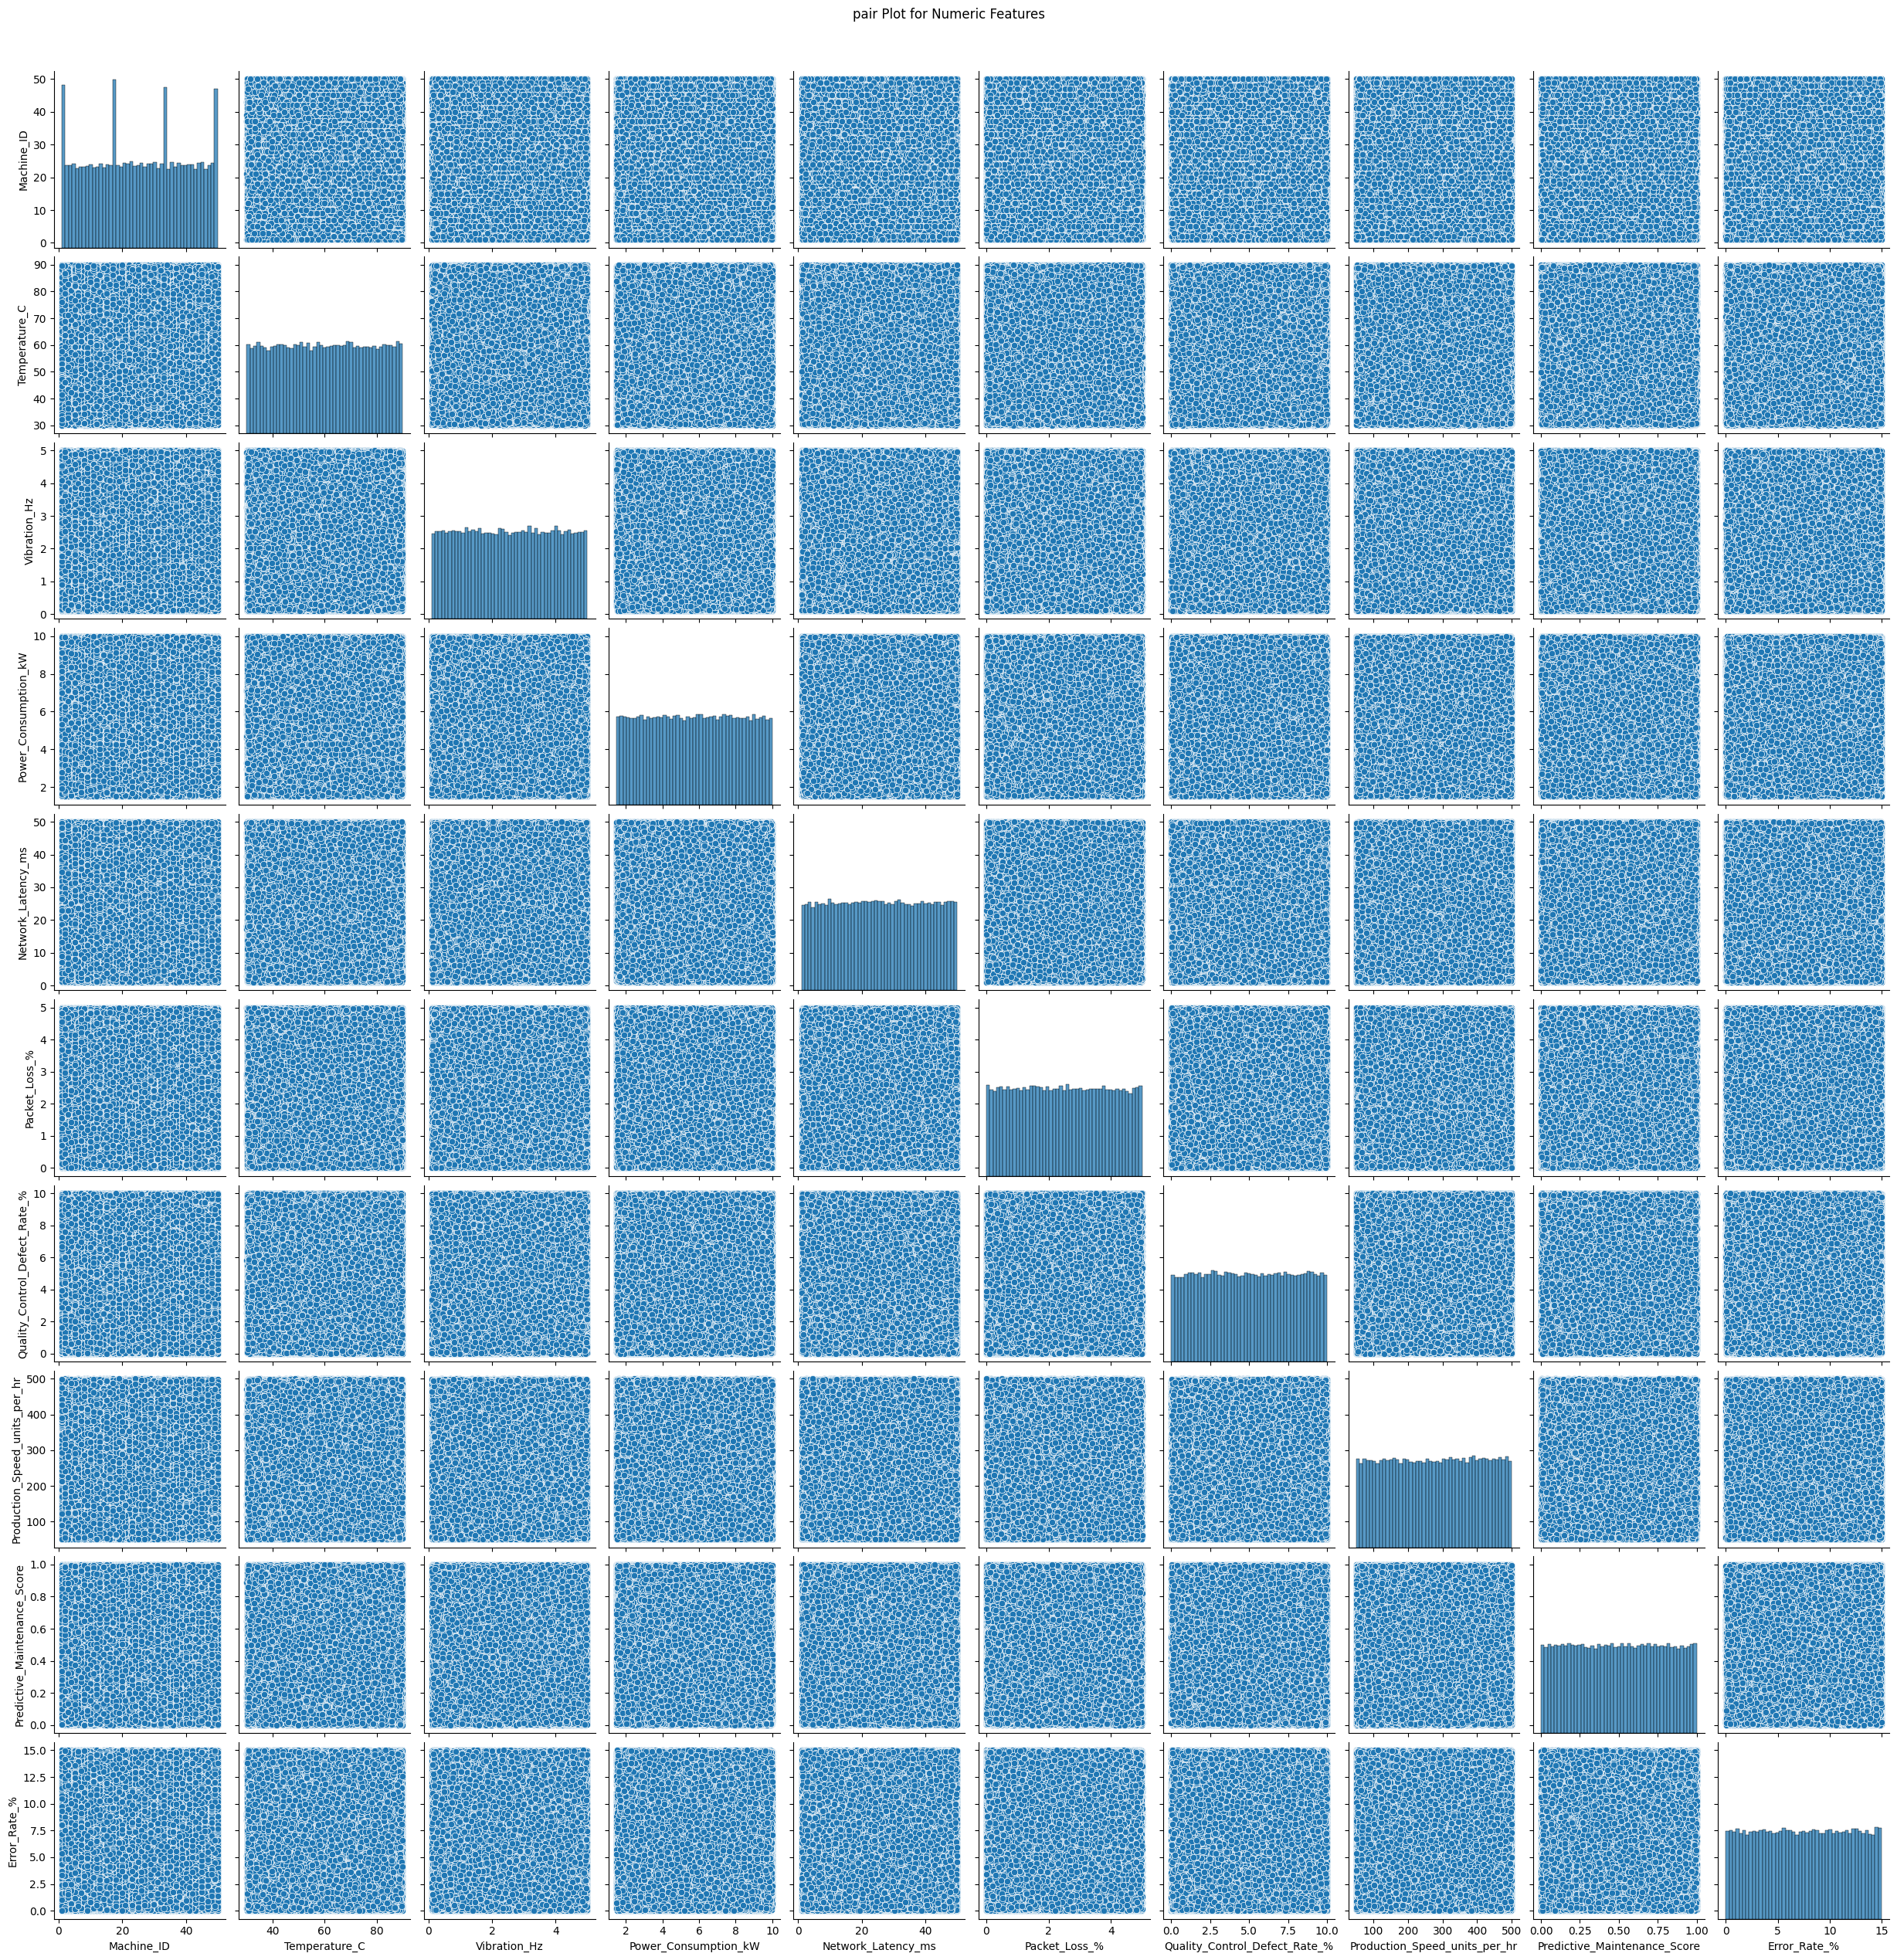

In [18]:
sns.pairplot(df[numeric_cols])
plt.suptitle('pair Plot for Numeric Features', y=1.02)
plt.show()

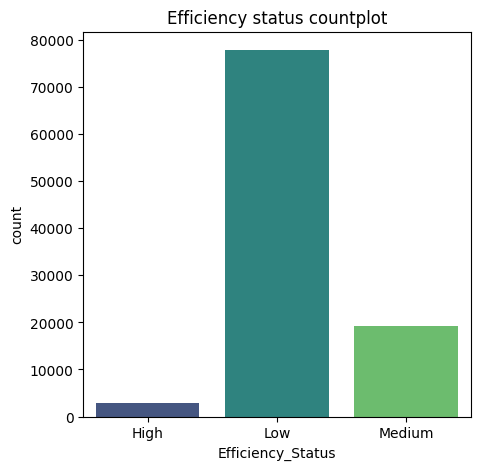

In [19]:
plt.figure(figsize=(5,5))
sns.countplot(x="Efficiency_Status", data=df, palette='viridis')
plt.title("Efficiency status countplot")
plt.show()

## Feature Engineering

In [20]:
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour

In [21]:
df.drop(columns=["Timestamp", "Machine_ID"], inplace=True)

In [22]:
df.shape

(100000, 15)

In [23]:
df.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0           Idle      74.137590      3.500595              8.612162   
1         Active      84.264558      3.355928              2.268559   
2         Active      44.280102      2.079766              6.144105   
3         Active      40.568502      0.298238              4.067825   
4           Idle      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

  Efficiency_Status  Year  Month  Day  Hour  
0               Low  2024      1    1     0  
1               Low  2024      1    1     0  
2               Low  2024      1    1     0  
3            Medium  2024      1    1     0  
4               Low  2024      1    1     0

In [24]:
df.describe()

Temperature_C   Vibration_Hz  Power_Consumption_kW  Network_Latency_ms  \
count  100000.000000  100000.000000         100000.000000       100000.000000   
mean       60.041458       2.549959              5.745929           25.555620   
std        17.323238       1.414127              2.451271           14.120758   
min        30.000138       0.100011              1.500183            1.000025   
25%        45.031596       1.323214              3.627318           13.355118   
50%        60.033597       2.549441              5.755460           25.536079   
75%        74.967217       3.776459              7.860267           37.796372   
max        89.998979       4.999974              9.999889           49.999917   

       Packet_Loss_%  Quality_Control_Defect_Rate_%  \
count  100000.000000                  100000.000000   
mean        2.493418                       5.008806   
std         1.443273                       2.883666   
min         0.000026                       0.000449   
25%         1.245026                       2.521591   
50%         2.487667                       5.003569   
75%         3.741252                       7.506127   
max         4.999975                       9.999900   

       Production_Speed_units_per_hr  Predictive_Maintenance_Score  \
count                  100000.000000                 100000.000000   
mean                      275.916324                      0.499385   
std                       130.096892                      0.288814   
min                        50.000375                      0.000003   
25%                       162.873618                      0.248166   
50%                       276.648922                      0.499209   
75%                       388.812761                      0.748810   
max                       499.996768                      0.999978   

        Error_Rate_%      Year          Month            Day           Hour  
count  100000.000000  100000.0  100000.000000  100000.000000  100000.000000  
mean        7.504100    2024.0       1.689600      14.118400      11.457400  
std         4.335896       0.0       0.697178       8.865549       6.924815  
min         0.000112    2024.0       1.000000       1.000000       0.000000  
25%         3.750148    2024.0       1.000000       6.000000       5.000000  
50%         7.504145    2024.0       2.000000      13.000000      11.000000  
75%        11.273189    2024.0       2.000000      22.000000      17.000000  
max        14.999869    2024.0       3.000000      31.000000      23.000000

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
Label_encoder = LabelEncoder()
df["Efficiency_target"] = Label_encoder.fit_transform(df["Efficiency_Status"])

In [38]:
Label_encoder = LabelEncoder()
df["Operation_Mode"] = Label_encoder.fit_transform(df["Operation_Mode"])

In [40]:
df.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0               1      74.137590      3.500595              8.612162   
1               0      84.264558      3.355928              2.268559   
2               0      44.280102      2.079766              6.144105   
3               0      40.568502      0.298238              4.067825   
4               1      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

  Efficiency_Status  Year  Month  Day  Hour  Efficiency_target  
0               Low  2024      1    1     0                  1  
1               Low  2024      1    1     0                  1  
2               Low  2024      1    1     0                  1  
3            Medium  2024      1    1     0                  2  
4               Low  2024      1    1     0                  1

In [29]:
df["Efficiency_Status"].value_counts()

Efficiency_Status
Low       77825
Medium    19189
High       2986
Name: count, dtype: int64

In [30]:
df["Efficiency_target"].value_counts()

Efficiency_target
1    77825
2    19189
0     2986
Name: count, dtype: int64

In [31]:
df.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Efficiency_Status',
       'Year', 'Month', 'Day', 'Hour', 'Efficiency_target'],
      dtype='object')

In [42]:
features = ['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%','Year', 'Month', 'Day', 'Hour'
]

In [43]:
X = df[features]

In [44]:
X.columns

Index(['Operation_Mode', 'Temperature_C', 'Vibration_Hz',
       'Power_Consumption_kW', 'Network_Latency_ms', 'Packet_Loss_%',
       'Quality_Control_Defect_Rate_%', 'Production_Speed_units_per_hr',
       'Predictive_Maintenance_Score', 'Error_Rate_%', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [45]:
y = df["Efficiency_target"]

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
X.head()

Operation_Mode  Temperature_C  Vibration_Hz  Power_Consumption_kW  \
0               1      74.137590      3.500595              8.612162   
1               0      84.264558      3.355928              2.268559   
2               0      44.280102      2.079766              6.144105   
3               0      40.568502      0.298238              4.067825   
4               1      75.063817      0.345810              6.225737   

   Network_Latency_ms  Packet_Loss_%  Quality_Control_Defect_Rate_%  \
0           10.650542       0.207764                       7.751261   
1           29.111810       2.228464                       4.989172   
2           18.357292       1.639416                       0.456816   
3           29.153629       1.161021                       4.582974   
4           34.029191       4.796520                       2.287716   

   Production_Speed_units_per_hr  Predictive_Maintenance_Score  Error_Rate_%  \
0                     477.657391                      0.344650     14.965470   
1                     398.174747                      0.769848      7.678270   
2                     108.074959                      0.987086      8.198391   
3                     329.579410                      0.983390      2.740847   
4                     159.113525                      0.573117     12.100686   

   Year  Month  Day  Hour  
0  2024      1    1     0  
1  2024      1    1     0  
2  2024      1    1     0  
3  2024      1    1     0  
4  2024      1    1     0

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y, test_size=0.2 , random_state=42 , stratify=y)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression(random_state=42,max_iter=1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [53]:
y_pred = clf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score , classification_report

In [55]:
accuracy_score(y_test,y_pred)

0.91655

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       597
           1       0.95      0.96      0.95     15565
           2       0.80      0.76      0.78      3838

    accuracy                           0.92     20000
   macro avg       0.86      0.85      0.86     20000
weighted avg       0.91      0.92      0.92     20000



## Permutation Importance

In [57]:
from sklearn.inspection import permutation_importance

In [58]:
result = permutation_importance(clf , X_test , y_test , n_repeats=10 , random_state=42 , n_jobs=-1)

In [59]:
importance_df = pd.DataFrame({
    'Feature' : features,
    'Importances' : result.importances_mean
})

In [60]:
importance_df.sort_values(by='Importances', ascending=False)

Feature  Importances
9                    Error_Rate_%     0.234895
7   Production_Speed_units_per_hr     0.117720
4              Network_Latency_ms     0.000235
6   Quality_Control_Defect_Rate_%     0.000150
3            Power_Consumption_kW     0.000150
13                           Hour     0.000145
1                   Temperature_C     0.000075
8    Predictive_Maintenance_Score     0.000015
2                    Vibration_Hz     0.000005
10                           Year     0.000000
12                            Day    -0.000055
5                   Packet_Loss_%    -0.000085
0                  Operation_Mode    -0.000180
11                          Month    -0.000440